# Analyzing Twitter JSON data

In [1]:
# Importing required libraries
import pandas as pd
from pandas.io.json import json_normalize
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read JSON file containing tweets data and removce tweets not in English
file = 'farmers-protest-tweets-2021-2-4.json'
raw_tweets = pd.read_json(file, lines=True)
raw_tweets = raw_tweets[raw_tweets['lang']=='en']
print("Shape: ", raw_tweets.shape)
raw_tweets.head(5)

Shape:  (48429, 21)


,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ArjunSinghPanam/status/136...,2021-02-24 09:23:35+00:00,The world progresses while the Indian police a...,The world progresses while the Indian police a...,1364506249291784198,"{'username': 'ArjunSinghPanam', 'displayname':...",[https://twitter.com/ravisinghka/status/136415...,[https://t.co/es3kn0IQAF],0,0,...,0,1364506249291784198,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/RaviSinghKA/statu...,"[{'username': 'narendramodi', 'displayname': '..."
1,https://twitter.com/PrdeepNain/status/13645062...,2021-02-24 09:23:32+00:00,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,#FarmersProtest \n#ModiIgnoringFarmersDeaths \...,1364506237451313155,"{'username': 'PrdeepNain', 'displayname': 'Pra...",[],[],0,0,...,0,1364506237451313155,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'Kisanektamorcha', 'displayname'..."
3,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:23:16+00:00,@ReallySwara @rohini_sgh watch full video here...,@ReallySwara @rohini_sgh watch full video here...,1364506167226032128,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,0,1364350947099484160,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'ReallySwara', 'displayname': 'S..."
8,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:22:34+00:00,@mandeeppunia1 watch full video here https://t...,@mandeeppunia1 watch full video here youtu.be/...,1364505991887347714,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,0,1364428985074032646,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ..."
11,https://twitter.com/anmoldhaliwal/status/13645...,2021-02-24 09:21:51+00:00,@mandeeppunia1 watch full video here https://t...,@mandeeppunia1 watch full video here youtu.be/...,1364505813834989568,"{'username': 'anmoldhaliwal', 'displayname': '...",[https://youtu.be/-bUKumwq-J8],[https://t.co/wBPNdJdB0n],0,0,...,0,1364480983995584515,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,NaN,None,"[{'username': 'mandeeppunia1', 'displayname': ..."


In [3]:
raw_tweets.columns

Index(['url', 'date', 'content', 'renderedContent', 'id', 'user', 'outlinks',
       'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'media',
       'retweetedTweet', 'quotedTweet', 'mentionedUsers'],
      dtype='object')

In [4]:
# fill null values with 0
raw_tweets = raw_tweets.fillna(0)

# Question 1

Bin the Tweets by day and report on the number of tweets per day.

1. Which day had the most Tweets? 

2. Which day had the least number of Tweets?

3. What was the general trend of Tweets overtime?

In [5]:
# check for all the months represented
raw_tweets.date.dt.strftime('%m').unique()

array(['02'], dtype=object)

output above confirms that all the Tweets occurred in February.

In [6]:
# Now check which days these Tweets occurred on.
raw_tweets.date.dt.strftime('%d').unique()

array(['24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14',
       '13', '12'], dtype=object)

Add a column called 'date_bin' which captures the month and day the Tweet occurred on.

In [7]:
raw_tweets['date_bin'] = raw_tweets.date.dt.strftime('%m/%d')

Now check how many Tweets occurred on each day, started with the high count.

In [8]:
raw_tweets['date_bin'].value_counts()

02/17    4516
02/12    4423
02/15    4407
02/14    4350
02/16    4343
02/13    4124
02/20    3730
02/18    3701
02/23    3566
02/19    3540
02/22    3133
02/21    3120
02/24    1476
Name: date_bin, dtype: int64

### 1. Which day had the most Tweets?

In [9]:
# Which day had the most Tweets?

most_tweets = raw_tweets['date_bin'].value_counts()[0]
highest_day = raw_tweets['date_bin'].value_counts().idxmax()

print('The day with the highest number of Tweets was:', highest_day)
print('Number of Tweets on this day:',most_tweets)

The day with the highest number of Tweets was: 02/17
Number of Tweets on this day: 4516


### 2. Which day had the least number of Tweets?

In [10]:
# Which day had the least number of Tweets?

least_tweets = raw_tweets['date_bin'].value_counts()[-1]
lowest_day = raw_tweets['date_bin'].value_counts().idxmin()

print('The day with the lowest number of Tweets was:', lowest_day)
print('Number of Tweets on this day:',least_tweets)

The day with the lowest number of Tweets was: 02/24
Number of Tweets on this day: 1476


### 3. What was the general trend of Tweets overtime?

Finally, show a trend line of Tweets for the entire month. 

We see that the number of Tweets has a general trend downward as time goes on.

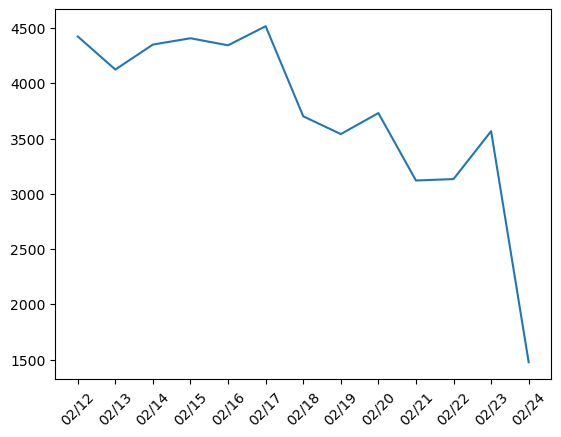

In [11]:
import matplotlib.pyplot as plt

value_counts = raw_tweets['date_bin'].value_counts().sort_index()
plt.plot(value_counts)
plt.xticks(rotation=45)
plt.show()

# Question 2
Find all the hashtags in the Twitter data and do some analysis.

1. What were the top 5 hashtags used in this data?

2. How many individual unique hashtags are used?

3. What is the min, max, and average number of hashtags used per Tweet?

In [12]:
# first, take the 'content' column and make it all lowercase so that #Farmersprotest 
# and #farmersprotest will be considered the same hashtag.
raw_tweets['lowercase'] = raw_tweets['content'].str.lower()

# Extract hashtags from 'content' column
raw_tweets['hashtags'] = raw_tweets['lowercase'].str.findall(r'#\w+')

In [13]:
raw_tweets['hashtags'].value_counts()

[#farmersprotest]                                                                                         12454
[#pagdi_sambhal_jatta, #farmersprotest]                                                                     706
[#farmersmakeindia, #farmersprotest]                                                                        674
[#msplawforallcrops, #farmersprotest]                                                                       613
[#farmersprotest, #mahapanchayatrevolution]                                                                 608
                                                                                                          ...  
[#india, #hindutvafacism, #warcrimes, #kashmir, #farmersprotest, #women, #girls, #freekashmir, #metoo]        1
[#farmersprotest, #nepotism]                                                                                  1
[#disharavi, #nikitajacob, #shantanumuluk, #farmersprotest, #farmersmakelndia]                          

### 1. What were the top 5 hashtags used in this data?

In [14]:
top_5 = raw_tweets['hashtags'].value_counts()[:5]

print('The top 5 hashtags are:')
print(top_5)

The top 5 hashtags are:
[#farmersprotest]                              12454
[#pagdi_sambhal_jatta, #farmersprotest]          706
[#farmersmakeindia, #farmersprotest]             674
[#msplawforallcrops, #farmersprotest]            613
[#farmersprotest, #mahapanchayatrevolution]      608
Name: hashtags, dtype: int64


### 2. How many individual unique hashtags are used?

In [15]:
unique_hashtags = []
# extract indivdiual hashtags used
for obj in list(raw_tweets['hashtags']):
    for hashtag in obj:
        unique_hashtags.append(hashtag)
unique_hashtags = set(unique_hashtags) # get only unique hashtags
unique_hashtags = list(unique_hashtags) # cast unique hashtags back into list
unique_hashtags[:10]

['#stopdivideandruleconspiracy',
 '#oneappealrepeal',
 '#vladimirputin',
 '#prime9news',
 '#coronavac',
 '#citizens_of_black_money_for_basic_needs',
 '#shaheed_jawaan_shaheed_kisaan',
 '#getlost',
 '#illustration',
 '#farmersrprotestinbihar']

In [16]:
print('There are {} unique hashtags used.'.format(len(unique_hashtags)))

There are 7973 unique hashtags used.


### 3. What is the min, max, and average number of hashtags used per Tweet?

In [17]:
raw_tweets['hashtags_count'] = raw_tweets['hashtags'].apply(lambda x: len(x))
raw_tweets[['lowercase','hashtags','hashtags_count']]

,lowercase,hashtags,hashtags_count
0,the world progresses while the indian police a...,"[#modidontsellfarmers, #farmersprotest, #freen...",3
1,#farmersprotest \n#modiignoringfarmersdeaths \...,"[#farmersprotest, #modiignoringfarmersdeaths, ...",3
3,@reallyswara @rohini_sgh watch full video here...,"[#farmersprotest, #nofarmersnofood]",2
8,@mandeeppunia1 watch full video here https://t...,"[#farmersprotest, #nofarmersnofood]",2
11,@mandeeppunia1 watch full video here https://t...,"[#farmersprotest, #nofarmersnofood]",2
...,...,...,...
117395,modi want to make you slave \n\nthis is free i...,"[#mahapanchayatrevolution, #farmersprotest]",2
117397,now farmers agitation is no longer confined to...,"[#mahapanchayatrevolution, #farmersprotest]",2
117400,the first mahapanchayat of punjab. the revolut...,"[#mahapanchayatrevolution, #farmersprotest]",2
117404,united we stand.\ndivided we fall\n#mahapancha...,"[#mahapanchayatrevolution, #farmersprotest]",2


In [18]:
hashtag_stats = raw_tweets['hashtags_count'].describe()
hashtag_stats

count    48429.000000
mean         2.816597
std          2.386539
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         25.000000
Name: hashtags_count, dtype: float64

In [19]:
ht_min = hashtag_stats[3]
ht_max = hashtag_stats[7]
ht_mean = hashtag_stats[1]

print('The minimum number of hashtags:',ht_min)
print('The maximum number of hashtags:',ht_max)
print('The average number of hashtags:',ht_mean)

The minimum number of hashtags: 1.0
The maximum number of hashtags: 25.0
The average number of hashtags: 2.816597493237523
